# Titanic survival prediction

## Data analysis

In [68]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
data_frame=pd.read_csv('train.csv')
data_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
data_frame.shape

(891, 12)

In [71]:
#removing the Id feature in the dataframe.
data_frame.drop(['PassengerId'],axis=1,inplace=True)

### Missing values.

In [72]:
null_value_features=[]
for cols in data_frame.columns:
    percentage=(data_frame[cols].isnull().sum()/len(data_frame[cols]))*100
    if percentage>0:
        print(cols,' has ',percentage,' null values')
        null_value_features.append(cols)

Age  has  19.865319865319865  null values
Cabin  has  77.10437710437711  null values
Embarked  has  0.22446689113355783  null values


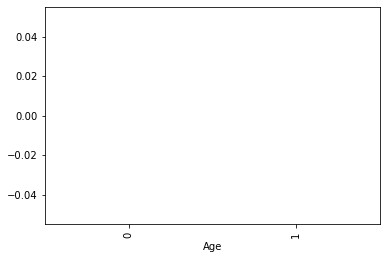

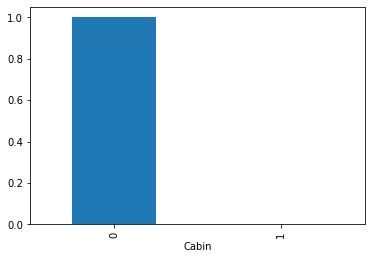

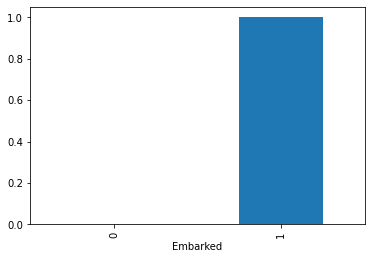

In [73]:
for cols in null_value_features:
    data=data_frame.copy()
    data[cols]=np.where(data[cols].isnull(),1,0)
    #data.groupby(cols)['Survived'].plot.bar()
    data.groupby(cols)['Survived'].median().plot.bar()
    plt.xlabel(cols)
    plt.show()

In [74]:
#replacing 'missing' in nan values.
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        data_frame[cols].fillna('Missing',inplace=True)
    else:
        data_frame[cols].fillna(data_frame[cols].median(),inplace=True)

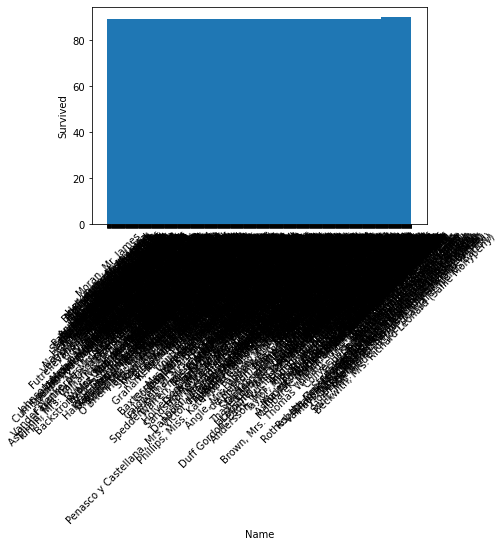

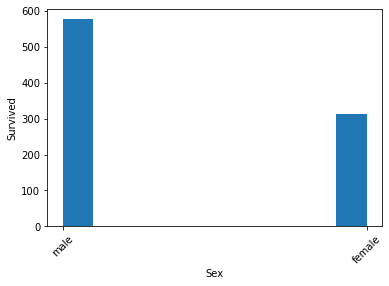

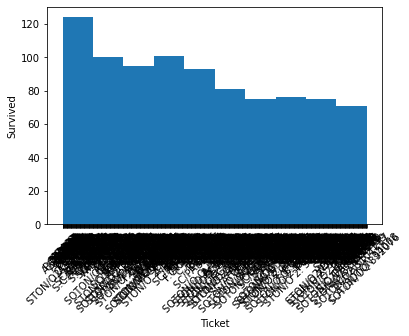

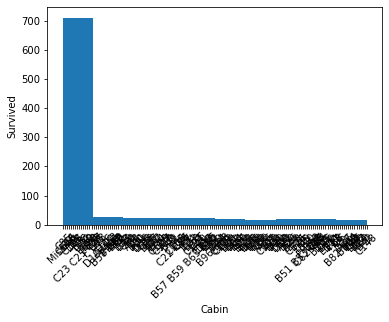

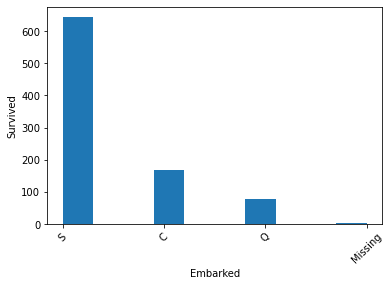

In [79]:
#relationship between categorical features and target variables.
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        plt.hist(data_frame[cols])
        plt.xlabel(cols)
        plt.xticks(rotation = 45)
        plt.ylabel('Survived')
        plt.show()

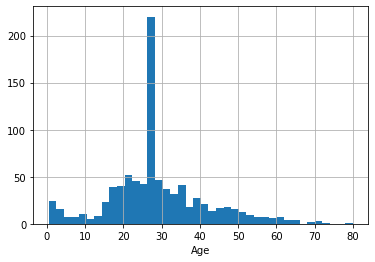

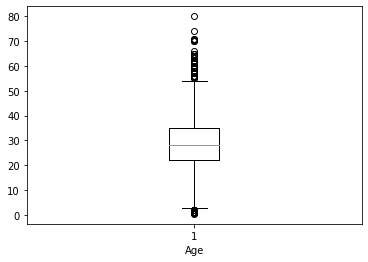

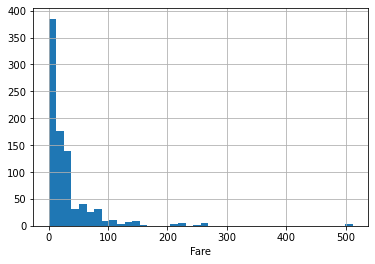

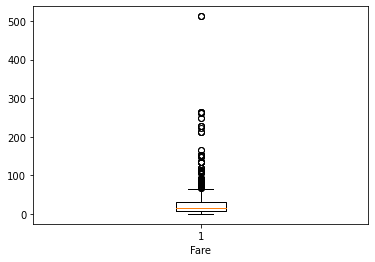

In [84]:
#realtionship between the numerical and target feature.
for cols in data_frame.columns:
    if data_frame[cols].dtype!='O':
        if len(data_frame[cols].value_counts())>25:
            data_frame[cols].hist(bins=40)
            plt.xlabel(cols)
            plt.show()
            plt.boxplot(data_frame[cols])
            plt.xlabel(cols)
            plt.show()

In [ ]:
#they were outliers in the data.